In [1]:
import numpy as np

In [2]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

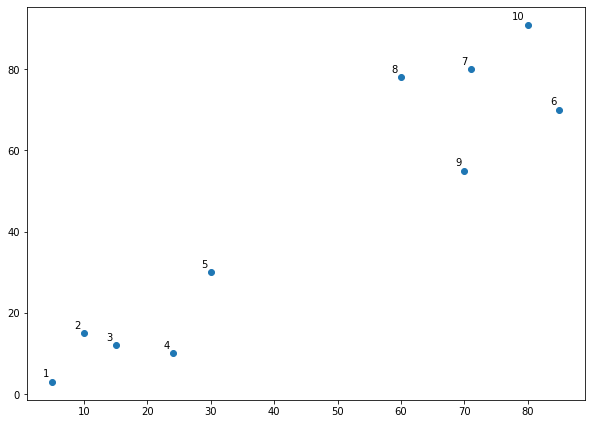

In [6]:
#Let's plot the above data points. To do so, execute the following code:

import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

[[ 1.          2.          5.83095189  2.        ]
 [ 3.         10.          9.21954446  3.        ]
 [ 6.          7.         11.18033989  2.        ]
 [ 0.         11.         13.          4.        ]
 [ 9.         12.         14.2126704   3.        ]
 [ 5.         14.         17.20465053  4.        ]
 [ 4.         13.         20.88061302  5.        ]
 [ 8.         15.         21.21320344  5.        ]
 [16.         17.         47.16990566 10.        ]]


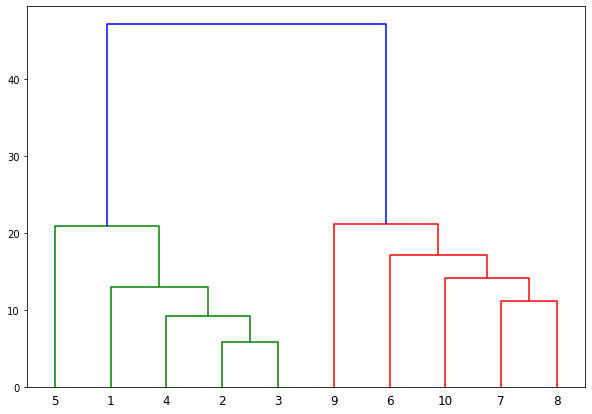

In [8]:
# Coming back to use of dendrograms in hierarchical clustering, let's draw the dendrograms for our data points.\
# We will use the scipy library for that purpose. Execute the following script:

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')
print(linked)
labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [9]:
# Once one big cluster is formed, the longest vertical distance without any horizontal line passing through it is selected
# and a horizontal line is drawn through it.
# The number of vertical lines this newly created horizontal line passes is equal to number of clusters.

# So we have 2 as number of clusters here

In [10]:
# Hierarchical Clustering via Scikit-Learn

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

In [11]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
# In the code above we import the AgglomerativeClustering class from the "sklearn.cluster" library. 
#The number of parameters is set to 2 using the n_clusters parameter while the affinity is set to "euclidean" (distance between the datapoints). 
#Finally linkage parameter is set to "ward", which minimizes the variant between the clusters.

print(cluster.labels_)
# The output is a one-dimensional array of 10 elements corresponding to the clusters assigned to our 10 data points.

[1 1 1 1 1 0 0 0 0 0]


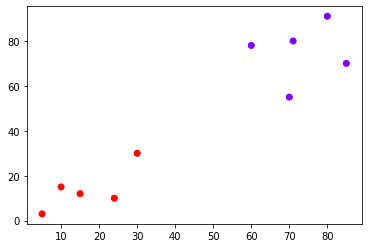

In [13]:
# Finally, let's plot our clusters. To do so, execute the following code:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

In [14]:
# Above, You can see points in two clusters where the first five points clustered together and the last five points clustered together.

In [15]:
# Example - 02)
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

customer_data = pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')
customer_data.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [16]:
customer_data.shape

(200, 5)

In [17]:
data = customer_data.iloc[:, 3:5].values

In [18]:
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

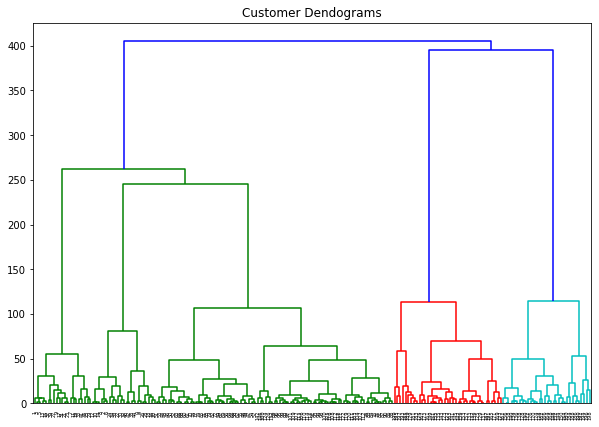

In [19]:
# Create Dendogram now

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [20]:
# If we draw a horizontal line that passes through longest distance without a horizontal line, 
# we get 5 clusters as shown in the figure.

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [21]:
# You can see the cluster labels from all of your data points. 
#Since we had five clusters, we have five labels in the output i.e. 0 to 4.

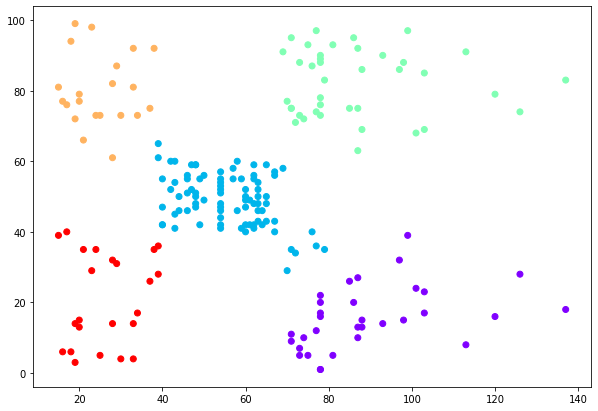

In [22]:
# As a final step, let's plot the clusters to see how actually our data has been clustered:

plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

In [ ]:
# Conclusion
# The clustering technique can be very handy when it comes to unlabeled data. Since most of the data in the real-world is unlabeled 
#and annotating the data has higher costs, 
#clustering techniques can be used to label unlabeled data.